# Estimation

**1. Method of Moments**
**2. Maximum Likelihood** 
**3. Least Squares** 

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

#import os
#os.chdir("C:\\Users\\Aram\\Documents\\Work\\AUA\\Time Series Forecasting\\Slides\\Lecture 6\\")

In [26]:
jonson = pd.read_csv(r'jj.csv') # Jonson & Jonson
jonson.head()

,index,value
0,1960 Q1,0.71
1,1960 Q2,0.63
2,1960 Q3,0.85
3,1960 Q4,0.44
4,1961 Q1,0.61


In [27]:
# The log difference to make data stationary
jonson['value'] = np.log(jonson['value'])           # log of values
jonson['value'] = jonson['value'].diff()            # Take first difference
jonson = jonson.drop(jonson.index[0])               # Remove first observation
jonson.head()

,index,value
1,1960 Q2,-0.119545
2,1960 Q3,0.299517
3,1960 Q4,-0.658462
4,1961 Q1,0.326684
5,1961 Q2,0.123233


### Method of Moments Estimation

While discussing method of moments, we will assume $\mu=0 .$ We consider the case in which the method leads to optimal (efficient) estimators, that is, AR $(p)$ models,

$$
x_{t}=\phi_{1} x_{t-1}+\cdots+\phi_{p} x_{t-p}+w_{t}
$$

where the first $p+1$ equations of ACF (TS, p. 97) lead to the following:

**Definition:** The Yule-Walker equations are given by

$$
\begin{aligned}
\gamma(h) &=\phi_{1} \gamma(h-1)+\cdots+\phi_{p} \gamma(h-p), \quad h=1,2, \ldots, p \\
\sigma_{w}^{2} &=\gamma(0)-\phi_{1} \gamma(1)-\cdots-\phi_{p} \gamma(p)
\end{aligned}
$$

In matrix notation, the Yule-Walker equations are

$$
\Gamma_{p} \phi=\gamma_{p}, \quad \sigma_{w}^{2}=\gamma(0)-\phi^{\prime} \gamma_{p}
$$

where $\Gamma_{p}=\{\gamma(k-j)\}_{j, k=1}^{p}$ is a $p \times p$ matrix, $\phi=\left(\phi_{1}, \ldots, \phi_{p}\right)^{\prime}$ is a $p \times 1$ vector, and $\gamma_{p}=(\gamma(1), \ldots, \gamma(p))^{\prime}$ is a $p \times 1$ vector. Using the **method of moments**, we replace $\gamma(h)$ by $\hat{\gamma}(h)$ and solve

$$
\hat{\phi}=\hat{\Gamma}_{p}^{-1} \hat{\gamma}_{p}, \quad \hat{\sigma}_{w}^{2}=\hat{\gamma}(0)-\hat{\gamma}_{p}^{\prime} \hat{\Gamma}_{p}^{-1} \hat{\gamma}_{p}
$$

These estimators are typically called the **Yule-Walker estimators**. 

For $\mathrm{AR}(p)$ models, if the sample size is large, the Yule-Walker estimators are approximately normally distributed, and $\hat{\sigma}_{w}^{2}$ is close to the true value of $\sigma_{w}^{2}$. 

**Property** Large Sample Results for Yule-Walker Estimators The asymptotic $(n \rightarrow \infty)$ behavior of the Yule-Walker estimators in the case of causal AR(p) processes is as follows:

$$
\sqrt{n}(\hat{\phi}-\phi) \stackrel{d}{\rightarrow} N\left(0, \sigma_{w}^{2} \Gamma_{p}^{-1}\right), \quad \hat{\sigma}_{w}^{2} \stackrel{p}{\rightarrow} \sigma_{w}^{2}
$$

The Durbin-Levinson algorithm can be used to calculate $\hat{\phi}$ without inverting $\hat{\Gamma}_{p}$ or $\hat{R}_{p},$ by replacing $\gamma(h)$ by $\hat{\gamma}(h)$ in the algorithm. 


https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.yule_walker.html

In [28]:
import statsmodels.api as sm
from statsmodels.datasets.sunspots import load
phi, sigma = sm.regression.yule_walker(jonson['value'], order=3)

In [29]:
# parameters of AR(3)
phi

array([-0.84414085, -0.74496406, -0.74206656])

In [30]:
# residual (innovations) standard deviation
sigma

0.11596548431764246

## Maximum Likelihood Estimation

To fix ideas, we first focus on the causal AR(1) case. Let

$$
x_{t}=\mu+\phi\left(x_{t-1}-\mu\right)+w_{t}
$$

where $|\phi|<1$ and $w_{t} \sim \operatorname{iid} \mathrm{N}\left(0, \sigma_{w}^{2}\right) .$ Given data $x_{1}, x_{2}, \ldots, x_{n},$ we seek the likelihood

$$
L\left(\mu, \phi, \sigma_{w}^{2}\right)=f\left(x_{1}, x_{2}, \ldots, x_{n} \mid \mu, \phi, \sigma_{w}^{2}\right)
$$

In the case of an AR(1), we may write the likelihood as

$$
L\left(\mu, \phi, \sigma_{w}^{2}\right)=f\left(x_{1}\right) f\left(x_{2} \mid x_{1}\right) \cdots f\left(x_{n} \mid x_{n-1}\right)
$$

where we have dropped the parameters in the densities, $f(\cdot),$ to ease the notation. Because $x_{t} \mid x_{t-1} \sim \mathrm{N}\left(\mu+\phi\left(x_{t-1}-\mu\right), \sigma_{w}^{2}\right),$ we have

$$
f\left(x_{t} \mid x_{t-1}\right)=f_{w}\left[\left(x_{t}-\mu\right)-\phi\left(x_{t-1}-\mu\right)\right]
$$

where $f_{w}(\cdot)$ is the density of $w_{t},$ that is, the normal density with mean zero and variance $\sigma_{w}^{2}$. We may then write the likelihood as

$$
L\left(\mu, \phi, \sigma_{w}\right)=f\left(x_{1}\right) \prod_{t=2}^{n} f_{w}\left[\left(x_{t}-\mu\right)-\phi\left(x_{t-1}-\mu\right)\right] .
$$

To find $f\left(x_{1}\right),$ we can use the causal representation

$$
x_{1}=\mu+\sum_{j=0}^{\infty} \phi^{j} w_{1-j}
$$

to see that $x_{1}$ is normal, with mean $\mu$ and variance $\sigma_{w}^{2} /\left(1-\phi^{2}\right)$. Finally, for an AR(1), the likelihood is

$$
L\left(\mu, \phi, \sigma_{w}^{2}\right)=\left(2 \pi \sigma_{w}^{2}\right)^{-n / 2}\left(1-\phi^{2}\right)^{1 / 2} \exp \left[-\frac{S(\mu, \phi)}{2 \sigma_{w}^{2}}\right],
$$
where

$$
S(\mu, \phi)=\left(1-\phi^{2}\right)\left(x_{1}-\mu\right)^{2}+\sum_{t=2}^{n}\left[\left(x_{t}-\mu\right)-\phi\left(x_{t-1}-\mu\right)\right]^{2}
$$

Typically, $S(\mu, \phi)$ is called the unconditional sum of squares. 

Taking the partial derlvative of the log of likelihood function with respect to $\sigma_{w}^{2}$ and setting the result equal to zero, we get that for any given values of $\mu$ and $\phi$ in the parameter space, $\sigma_{w}^{2}=n^{-1} S(\mu, \phi)$ maximizes the likelihood. Thus, the maximum likelihood estimate of $\sigma_{w}^{2}$ is
$$
\hat{\sigma}_{w}^{2}=n^{-1} S(\hat{\mu}, \hat{\phi}),
$$
where $\hat{\mu}$ and $\hat{\phi}$ are the MLEs of $\mu$ and $\phi$, respectively. 
 
To have more convenient variant of linkelihood function, $l(\mu, \phi)$, we replace $\sigma_{w}^{2}$ by $\hat{\sigma}_{w}^{2}$, take logs and ignore constants. Because $l(\mu, \phi)$ and $S(\mu, \phi)$ are complicated functions of the parameters, the minimization is accomplished numerically. 


In the case of AR models, we have the advantage that, conditional on inital values, they are linear models. That is, we can drop the term in the likelihood that causes the nonlinearity. Conditioning on $x_{1},$ the conditional likelihood becomes

$$
\begin{aligned}
L\left(\mu, \phi, \sigma_{w}^{2} \mid x_{1}\right) &=\prod_{t=2}^{n} f_{w}\left[\left(x_{t}-\mu\right)-\phi\left(x_{t-1}-\mu\right)\right] \\
&=\left(2 \pi \sigma_{w}^{2}\right)^{-(n-1) / 2} \exp \left[-\frac{S_{c}(\mu, \phi)}{2 \sigma_{w}^{2}}\right]
\end{aligned}
$$

where the conditional sum of squares is

$$
S_{c}(\mu, \phi)=\sum_{t=2}^{n}\left[\left(x_{t}-\mu\right)-\phi\left(x_{t-1}-\mu\right)\right]^{2}
$$

The conditional MLE of $\sigma_{w}^{2}$ is

$$
\hat{\sigma}_{w}^{2}=S_{c}(\hat{\mu}, \hat{\phi}) /(n-1)
$$

and $\hat{\mu}$ and $\hat{\phi}$ are the values that minimize the conditional sum of squares, $S_{c}(\mu, \phi)$. 



In [22]:
#help(ARIMA)

In [35]:
from statsmodels.tsa.arima.model import ARIMA
mod_mle = ARIMA(jonson['value'], order=(3,0,0))
result_mle = mod_mle.fit()
print(result_mle.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   83
Model:                 ARIMA(3, 0, 0)   Log Likelihood                  77.908
Date:                Sun, 19 Mar 2023   AIC                           -145.815
Time:                        20:52:10   BIC                           -133.721
Sample:                             0   HQIC                          -140.957
                                 - 83                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0389      0.003     12.743      0.000       0.033       0.045
ar.L1         -0.9194      0.054    -17.115      0.000      -1.025      -0.814
ar.L2         -0.8470      0.081    -10.427      0.0

In [31]:
from statsmodels.tsa.arima.model import ARIMA
mod_mle = ARIMA(jonson['value'], order=(3,0,0))
result_mle = mod_mle.fit(method = "innovations_mle")
print(result_mle.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   83
Model:                 ARIMA(3, 0, 0)   Log Likelihood                  77.908
Date:                Sun, 19 Mar 2023   AIC                           -145.817
Time:                        20:50:48   BIC                           -133.723
Sample:                             0   HQIC                          -140.958
                                 - 83                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0389      0.003     12.733      0.000       0.033       0.045
ar.L1         -0.9198      0.054    -17.116      0.000      -1.025      -0.814
ar.L2         -0.8457      0.081    -10.407      0.0

## Least Squares Estimation

We could have also considered the estimation of $\mu$ and $\phi$ using unconditional least squares, that is, estimatlon by minimizing $S(\mu, \phi)$.


Letting $\alpha=\mu(1-\phi)$, the conditional sum of squares can be written as

$$
S_{c}(\mu, \phi)=\sum_{t=2}^{n}\left[x_{t}-\left(\alpha+\phi x_{t-1}\right)\right]^{2}
$$

The problem is now the linear regression problem (Section 2.1, TS). Following the results from least squares estimation, we have $\hat{\alpha}=\bar{x}_{(2)}-\hat{\phi} \bar{x}_{(1)},$ where $\bar{x}_{(1)}=$ $(n-1)^{-1} \sum_{t-1}^{n-1} x_{t},$ and $\bar{x}_{(2)}=(n-1)^{-1} \sum_{t-2}^{n} x_{t},$ and the conditional estimates are then

$$
\begin{array}{c}
\hat{\mu}=\frac{\bar{x}_{(2)}-\hat{\phi} \bar{x}_{(1)}}{1-\hat{\phi}} \\
\hat{\phi}=\frac{\sum_{t-2}^{n}\left(x_{I}-\bar{x}_{(2)}\right)\left(x_{t-1}-\bar{x}_{(1)}\right)}{\sum_{t-2}^{n}\left(x_{t-1}-\bar{x}_{(1)}\right)^{2}}
\end{array}
$$



From the last two equations, we see that $\hat{\mu} \approx \bar{x}$ and $\hat{\phi} \approx \hat{\rho}(1) .$ That is, the Yule-Walker estimators and the conditional least squares estimators are approximately the same. The only difference is the inclusion or exclusion of terms involving the endpoints, $x_{1}$ and $x_{n}$. We can also adjust the estimate of $\sigma_{w}^{2}$ to be equivalent to the least squares estimator, that is, divide $S_{c}(\hat{\mu}, \hat{\phi})$ by $(n-3)$ instead of $(n-1)$ in $\hat{\sigma}_{w}^{2}=S_{c}(\hat{\mu}, \hat{\phi}) /(n-1)$.

In [36]:
# generate lag = 1,2,3 as a new columns in dataframe 
jonson['lag1'] = jonson['value'].shift(1)
jonson['lag2'] = jonson['value'].shift(2)
jonson['lag3'] = jonson['value'].shift(3)

In [37]:
# linear regression via OLS
mod_ols = sm.formula.ols(formula = "value ~ lag1 + lag2+lag3", 
                 data=jonson, missing='drop')
res_ols = mod_ols.fit()
print(res_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     102.5
Date:                Sun, 19 Mar 2023   Prob (F-statistic):           1.24e-26
Time:                        20:52:34   Log-Likelihood:                 81.942
No. Observations:                  80   AIC:                            -155.9
Df Residuals:                      76   BIC:                            -146.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1358      0.012     11.765      0.0

In [38]:
res_ols.resid.var()

0.007643872860016219

## Application of methods

Method of moments estimation is efficient in case of AR(p) processes, least squares and maximum likelihood methods for the ARMA(p,q) and MA(q) processes. By default built in functions use conditional sum of squares and maximum likelihood methods for estimation of ARMA(p,q) processes. Solvers like Newton-Ramphson are used in estimation since the optimization functions are complicated. 

After the estimation step, **residual diagnostics** can be done, to check the model validity (see the residual plots below). 

In [39]:
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(jonson['value'], order=(3,0,0))
result = mod.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   83
Model:                 ARIMA(3, 0, 0)   Log Likelihood                  77.908
Date:                Sun, 19 Mar 2023   AIC                           -145.815
Time:                        21:04:13   BIC                           -133.721
Sample:                             0   HQIC                          -140.957
                                 - 83                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0389      0.003     12.743      0.000       0.033       0.045
ar.L1         -0.9194      0.054    -17.115      0.000      -1.025      -0.814
ar.L2         -0.8470      0.081    -10.427      0.0

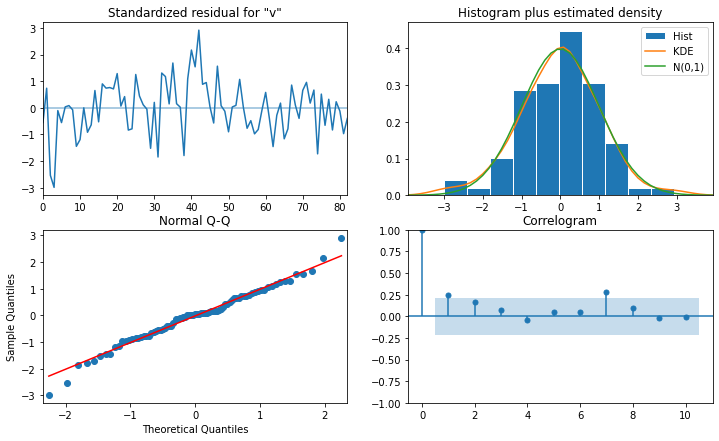

In [40]:
result.plot_diagnostics(figsize=(12,7))
plt.show()

It looks like ACF(1) is significantly differs from zero and residuals diverge from fitted line in Q-Q plot. Hence, there is room for improvement. As we know from our previous analysis AR(4) gives better results (has smaller AIC). Though it's not the best model, you can find one considering AIC's or BIC's for different combinations of p and q.

In [41]:
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(jonson['value'], order=(4,0,0))
result = mod.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   83
Model:                 ARIMA(4, 0, 0)   Log Likelihood                  80.624
Date:                Sun, 19 Mar 2023   AIC                           -149.248
Time:                        21:05:16   BIC                           -134.735
Sample:                             0   HQIC                          -143.417
                                 - 83                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0384      0.004      9.575      0.000       0.031       0.046
ar.L1         -0.6830      0.113     -6.040      0.000      -0.905      -0.461
ar.L2         -0.6099      0.117     -5.206      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


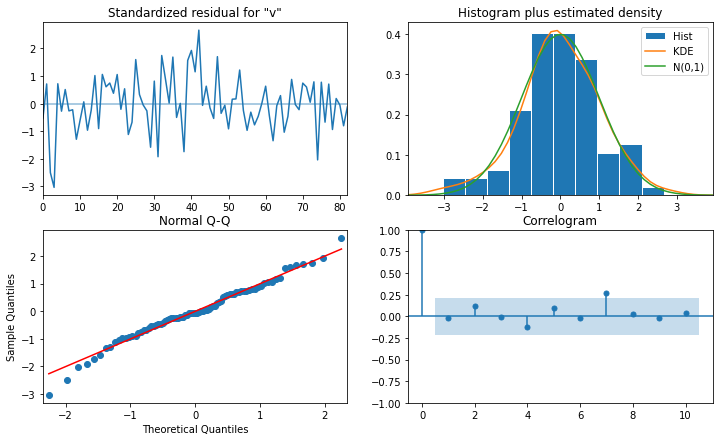

In [42]:
result.plot_diagnostics(figsize=(12,7))
plt.show()